Аббревиатура **XML** расшифровывается как eXtensible Markup Language — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

Для работы с XML-файлами мы будем использовать модуль `ElementTree` , входящий в стандартный пакет xml. Этот модуль позволит нам «перемещаться» по дереву XML и смотреть, что находится в каждом его узле, начиная с корня и заканчивая листьями.

In [1]:
# Импортируем модуль ElementTree
import xml.etree.ElementTree as ET

In [3]:
tree = ET.parse('data/menu.xml')

> Запишем в переменную `root` корневой узел дерева `tree` и посмотрим, как выглядит содержимое переменной `root`, для чего выполним код:

### КОРЕНЬ

In [4]:
root = tree.getroot()
display(root)

<Element 'menu' at 0x0000023C17ABF010>

In [5]:
display(type(root))

xml.etree.ElementTree.Element

### ПОТОМКИ

> Для того чтобы посмотреть список потомков корневого узла, выполним следующий код:

In [6]:
display(list(root))

[<Element 'dish' at 0x0000023C17ABF060>,
 <Element 'dish' at 0x0000023C17ABF1A0>]

Итак, использование list(root) возвращает список потомков указанного узла. У узла root, который представляет меню, два потомка, а именно — два блюда, которые представлены тегами dish.

> Для того чтобы получить список потомков второго блюда в нашем меню и вывести его на экран, выполним код:

In [7]:
display(list(root[1]))

[<Element 'price' at 0x0000023C17ABF1F0>,
 <Element 'weight' at 0x0000023C17ABF600>,
 <Element 'class' at 0x0000023C17ABF650>]

### АТРИБУТЫ И ТЕГИ

> Выведем на экран атрибуты первого блюда из меню:

In [8]:
display(root[0].attrib)

{'name': 'Кура'}

В XML-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту text у соответствующего объекта типа ElementTree.Element.

> Например, возьмём узел price первого блюда из меню:

In [9]:
display(root[0][0])

<Element 'price' at 0x0000023C17ABF0B0>

> Теперь прочитаем значение этого узла с помощью text:

In [10]:
display(root[0][0].text)

'40'

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать tag. Например, получим наименование тега корневого узла:

In [11]:
display(root.tag)

'menu'

### ИСПОЛЬЗОВАНИЕ ЦИКЛОВ

На этом шаге мы решим задачу вывода на экран наименование всех блюд из меню, а также информацию о них (иными словами, нам необходимо обойти дерево и вывести на экран значения его листьев).

> Используя цикл for, автоматизируем обход дерева. Для этого напишем следующий код:

In [12]:
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



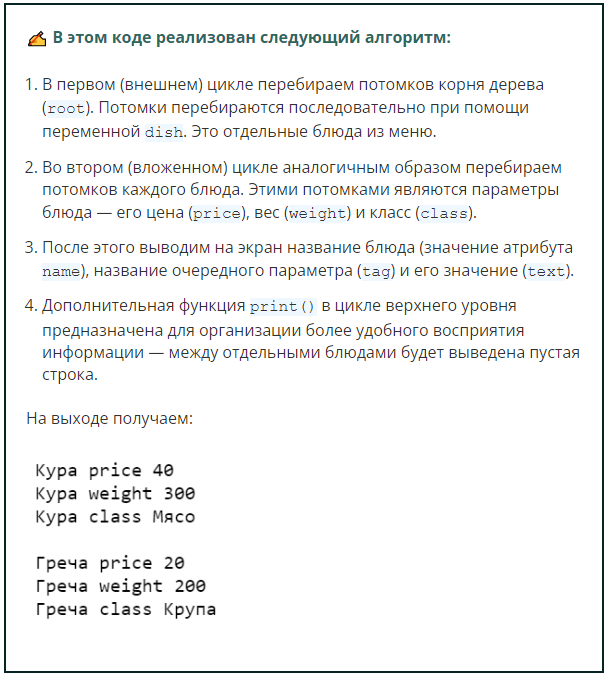